## 🧪 MÓDULO: Filtrado y limpieza inicial del archivo `Covid19Casos.csv`

---

### ✅ OBJETIVO:
Reducir el tamaño y la complejidad del archivo original para facilitar su análisis posterior y optimizar el uso de memoria.

---

### 📂 ARCHIVO ORIGINAL:
- **Nombre:** `Covid19Casos.csv`
- **Tamaño:** ~6.4 GB
- **Columnas:** 25
- **Filas:** ~29.9 millones
- **Problemas:** muchas columnas irrelevantes o con alta cantidad de datos faltantes.

---

### 🔍 FILTRADO:
Se seleccionaron únicamente **8 columnas clave** para el análisis:

- `sexo`
- `edad`
- `residencia_provincia_nombre`
- `cuidado_intensivo`
- `fallecido`
- `asistencia_respiratoria_mecanica`
- `origen_financiamiento`
- `clasificacion`

💡 Estas columnas fueron elegidas por su relevancia epidemiológica y porque están más completas en términos de datos.

---

### 🧹 LIMPIEZA:
- Se eliminaron todas las filas con datos faltantes usando `dropna()`.
- Este paso es **opcional** y depende del objetivo del análisis.
- En este caso, se priorizó un dataset limpio desde el inicio.

---

### 💾 MÉTODO DE CARGA:
- El archivo fue leído en bloques de **100.000 filas** (`chunksize`) para evitar desbordar la memoria RAM.
- Cada bloque fue **limpiado** y **guardado progresivamente** en un nuevo archivo CSV.

---

### 📁 ARCHIVO RESULTANTE:
- **Nombre:** `covid_8_columnas.csv`
- **Tamaño final:** ~2.0 GB
- **Columnas:** 8
- **Filas:** ~29 millones (dependiendo de la cantidad eliminada por nulos)

---

### 🔧 PRÓXIMOS PASOS:
- Optimizar **tipos de datos** para reducir aún más el uso de memoria.
- Cargar los datos en una **base de datos relacional** (SQLite o PostgreSQL).
- Analizar y **graficar patrones** a lo largo del tiempo.


In [2]:
import pandas as pd

# Ruta al archivo original
ruta_original = "Covid19Casos.csv"

# Ruta al nuevo archivo reducido
ruta_salida = "covid_8_columnas.csv"

# Columnas que querés conservar
columnas_deseadas = [
    'sexo',
    'edad',
    'residencia_provincia_nombre',
    'cuidado_intensivo',
    'fallecido',
    'asistencia_respiratoria_mecanica',
    'origen_financiamiento',
    'clasificacion'
]

# Leer por bloques (chunks)
chunksize = 100_000
primera_vez = True

for chunk in pd.read_csv(ruta_original, usecols=columnas_deseadas, chunksize=chunksize, low_memory=False):
    # Eliminar filas con valores nulos (opcional, depende de tu análisis)
    chunk = chunk.dropna()

    # Guardar el bloque en el archivo de salida
    chunk.to_csv(ruta_salida, mode='w' if primera_vez else 'a', index=False, header=primera_vez)
    primera_vez = False

print("✅ Archivo 'covid_8_columnas.csv' generado exitosamente.")


✅ Archivo 'covid_8_columnas.csv' generado exitosamente.


### 📥 Carga del archivo filtrado y exploración inicial

En esta celda:

- Se carga el archivo CSV reducido `covid_8_columnas.csv` en un DataFrame llamado `df`.
- Se utiliza `df.info()` para inspeccionar:
  - Cantidad total de registros.
  - Tipos de datos de cada columna.
  - Presencia de valores faltantes.
- Luego se usa `df.head()` para visualizar las primeras filas del dataset y verificar su estructura.

Esta etapa es clave para entender con qué tipo de datos estamos trabajando antes de avanzar con transformaciones o análisis.

In [3]:
import pandas as pd 

df = pd.read_csv("covid_8_columnas.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29963461 entries, 0 to 29963460
Data columns (total 8 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   sexo                              object 
 1   edad                              float64
 2   residencia_provincia_nombre       object 
 3   cuidado_intensivo                 object 
 4   fallecido                         object 
 5   asistencia_respiratoria_mecanica  object 
 6   origen_financiamiento             object 
 7   clasificacion                     object 
dtypes: float64(1), object(7)
memory usage: 1.8+ GB


,sexo,edad,residencia_provincia_nombre,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion
0,M,55.0,CABA,NO,NO,NO,Privado,Caso Descartado
1,F,53.0,CABA,NO,NO,NO,Público,Caso Descartado
2,F,23.0,Buenos Aires,NO,NO,NO,Público,Caso Descartado
3,F,45.0,Buenos Aires,NO,NO,NO,Público,Caso Descartado
4,F,34.0,CABA,NO,NO,NO,Público,Caso Descartado


## Optimización de tipos de datos

🎯 **Objetivo:** Reducir el uso de memoria RAM optimizando los tipos de datos del DataFrame `covid_8_columnas.csv`.

### 🔧 Cambios aplicados:
- Se convirtieron columnas tipo `object` a `category`:
  - Esto reduce significativamente el uso de memoria.
  - Mejora el rendimiento en operaciones como filtrado, agrupamiento y ordenamiento.
  - Ideal para variables con pocos valores únicos (`sexo`, `fallecido`, etc).

- Se convirtió la columna `edad` de `float64` a un tipo entero más pequeño (`int16` o `int32`) usando `pd.to_numeric(..., downcast='integer')`:
  - No se necesitan decimales para edades.
  - Esto también ayuda a reducir el uso de memoria.

In [ ]:
import pandas as pd

# Cargá el archivo optimizando tipos
df = pd.read_csv("covid_8_columnas.csv", dtype={
    "sexo": "category",
    "residencia_provincia_nombre": "category",
    "cuidado_intensivo": "category",
    "fallecido": "category",
    "asistencia_respiratoria_mecanica": "category",
    "origen_financiamiento": "category",
    "clasificacion": "category"
}, low_memory=False)

# Convertí edad a entero si no necesitás decimales
df["edad"] = pd.to_numeric(df["edad"], downcast='integer')  # Int16 o Int32 según el valor

# Verificá
print(df.dtypes)




sexo                                category
edad                                   int16
residencia_provincia_nombre         category
cuidado_intensivo                   category
fallecido                           category
asistencia_respiratoria_mecanica    category
origen_financiamiento               category
clasificacion                       category
dtype: object


# Informe del Análisis Exploratorio de Datos COVID-19

## 📌 Objetivo
Este código realiza un análisis completo del dataset `covid_8_columnas.csv` para extraer información clave sobre los casos de COVID-19.

## 🔍 Funcionalidades principales

### 1. Carga y estructura básica
- Carga el archivo CSV `covid_8_columnas.csv`
- Muestra la cantidad de valores únicos por columna

### 2. Análisis de distribuciones
- **Variables categóricas**:
  - Distribución por sexo
  - Distribución por estado de fallecimiento
  - Frecuencia de métodos de clasificación (top 10)

### 3. Análisis numérico
- Estadísticas descriptivas básicas para la edad (media, desviación, percentiles)

### 4. Métricas clave
- Calcula y muestra:
  - Total de casos en el dataset
  - Casos positivos confirmados (búsqueda insensible a mayúsculas)
  - Porcentaje de casos positivos
  - Tasa de mortalidad general

### 5. Calidad de datos
- Identifica valores faltantes por columna

### 6. Análisis adicional (opcional)
- Muestra distribución por provincia (top 5) si existe la columna


## 📊 Salidas generadas
1. Resumen de valores únicos por columna
2. Distribuciones de variables categóricas
3. Estadísticas de edad
4. Métricas principales (totales y porcentajes)
5. Reporte de calidad de datos (valores faltantes)
6. Distribución por provincia (si aplica)

## 💡 Observaciones
- El criterio para casos positivos busca "Confirmado" (insensible a mayúsculas/minúsculas)
- Todos los porcentajes se calculan sobre el total de casos válidos
- El análisis de provincia es opcional (depende de la existencia del campo)

In [4]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("covid_8_columnas.csv")

# 1. Análisis de valores únicos por columna
print("=== VALORES ÚNICOS POR COLUMNA ===")
print(df.nunique())
print("\n")

# 2. Conteo de valores para variables categóricas clave
print("=== DISTRIBUCIÓN POR SEXO ===")
print(df["sexo"].value_counts(dropna=False))
print("\n")

print("=== DISTRIBUCIÓN POR FALLECIMIENTO ===")
print(df["fallecido"].value_counts(dropna=False))
print("\n")

print("=== DISTRIBUCIÓN POR CLASIFICACIÓN ===")
print(df["clasificacion"].value_counts(dropna=False))
print("\n")

# 3. Análisis de edad
print("=== ESTADÍSTICAS DE EDAD ===")
print(df["edad"].describe())
print("\n")

# 4. Cantidad total de casos positivos
total_casos = len(df)
casos_positivos = len(df[df["clasificacion"].str.contains("Confirmado|confirmado", case=False, na=False)])

print(f"=== TOTAL DE CASOS EN EL DATASET: {total_casos:,} ===")
print(f"=== CASOS POSITIVOS (CONFIRMADOS): {casos_positivos:,} ===")
print(f"=== PORCENTAJE DE CASOS POSITIVOS: {casos_positivos/total_casos*100:.2f}% ===")

# 5. Análisis adicional de calidad de datos
print("\n=== DATOS FALTANTES POR COLUMNA ===")
print(df.isnull().sum())

# 6. Estadísticas de mortalidad
if 'fallecido' in df.columns:
    mortalidad = df['fallecido'].value_counts(normalize=True) * 100
    print("\n=== TASA DE MORTALIDAD ===")
    print(f"Fallecidos: {mortalidad.get('SI', 0):.2f}%")
    print(f"No fallecidos: {mortalidad.get('NO', 0):.2f}%")

=== VALORES ÚNICOS POR COLUMNA ===
sexo                                  3
edad                                149
residencia_provincia_nombre          25
cuidado_intensivo                     2
fallecido                             2
asistencia_respiratoria_mecanica      2
origen_financiamiento                 3
clasificacion                        33
dtype: int64


=== DISTRIBUCIÓN POR SEXO ===
sexo
F     15841433
M     13967260
NR      154768
Name: count, dtype: int64


=== DISTRIBUCIÓN POR FALLECIMIENTO ===
fallecido
NO    29810536
SI      152925
Name: count, dtype: int64


=== DISTRIBUCIÓN POR CLASIFICACIÓN ===
clasificacion
Caso Descartado                                                                              19659351
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                         8230047
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)      650766
Caso sospechoso - No Activo - Sin muestra               

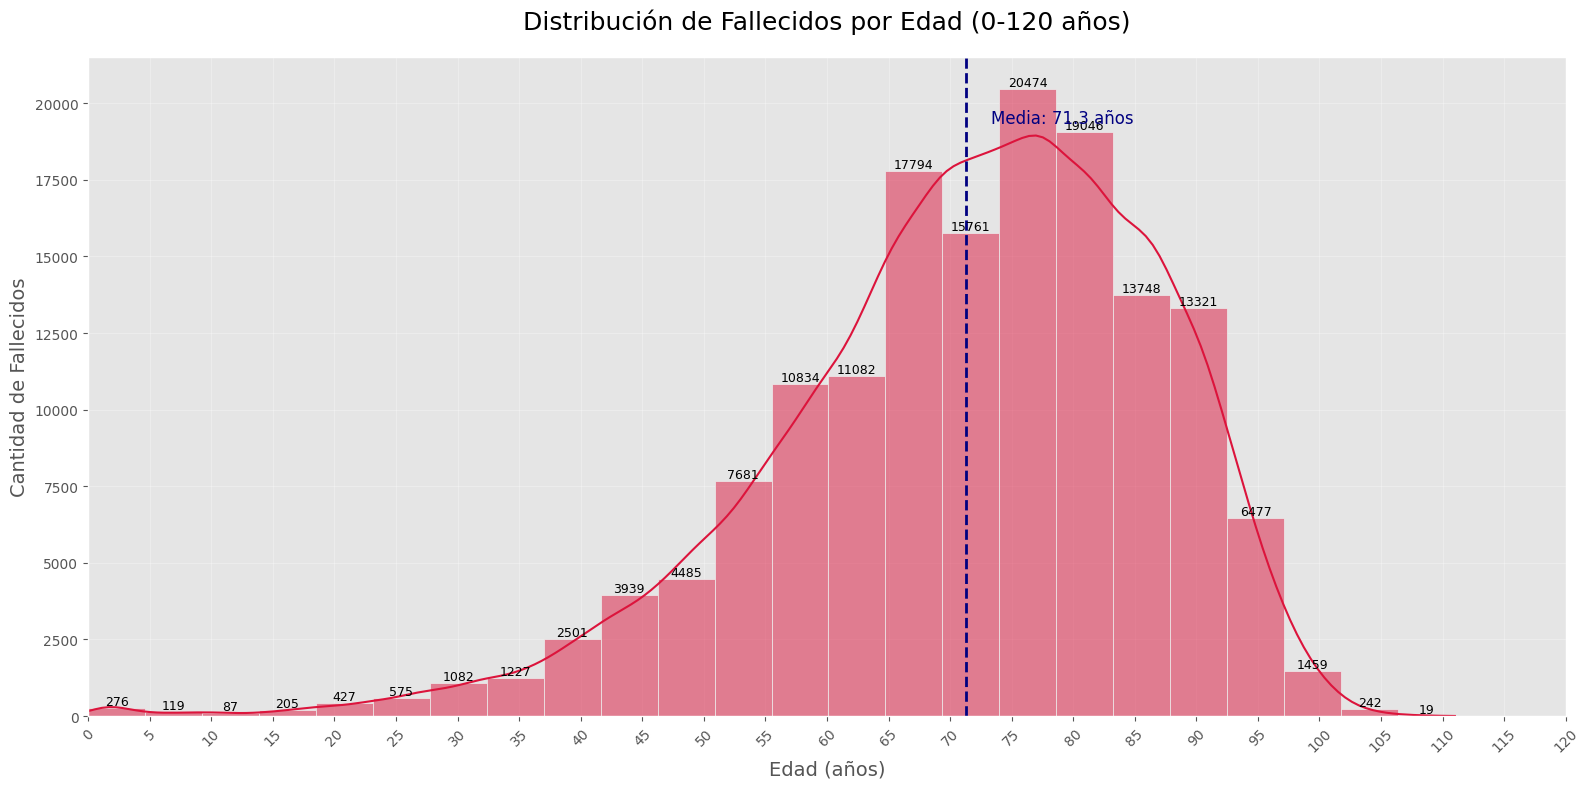

C:\Users\sebastian\AppData\Local\Temp\ipykernel_9132\2209815052.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_provincias_positivas.values, y=top_provincias_positivas.index, palette='Blues_d')


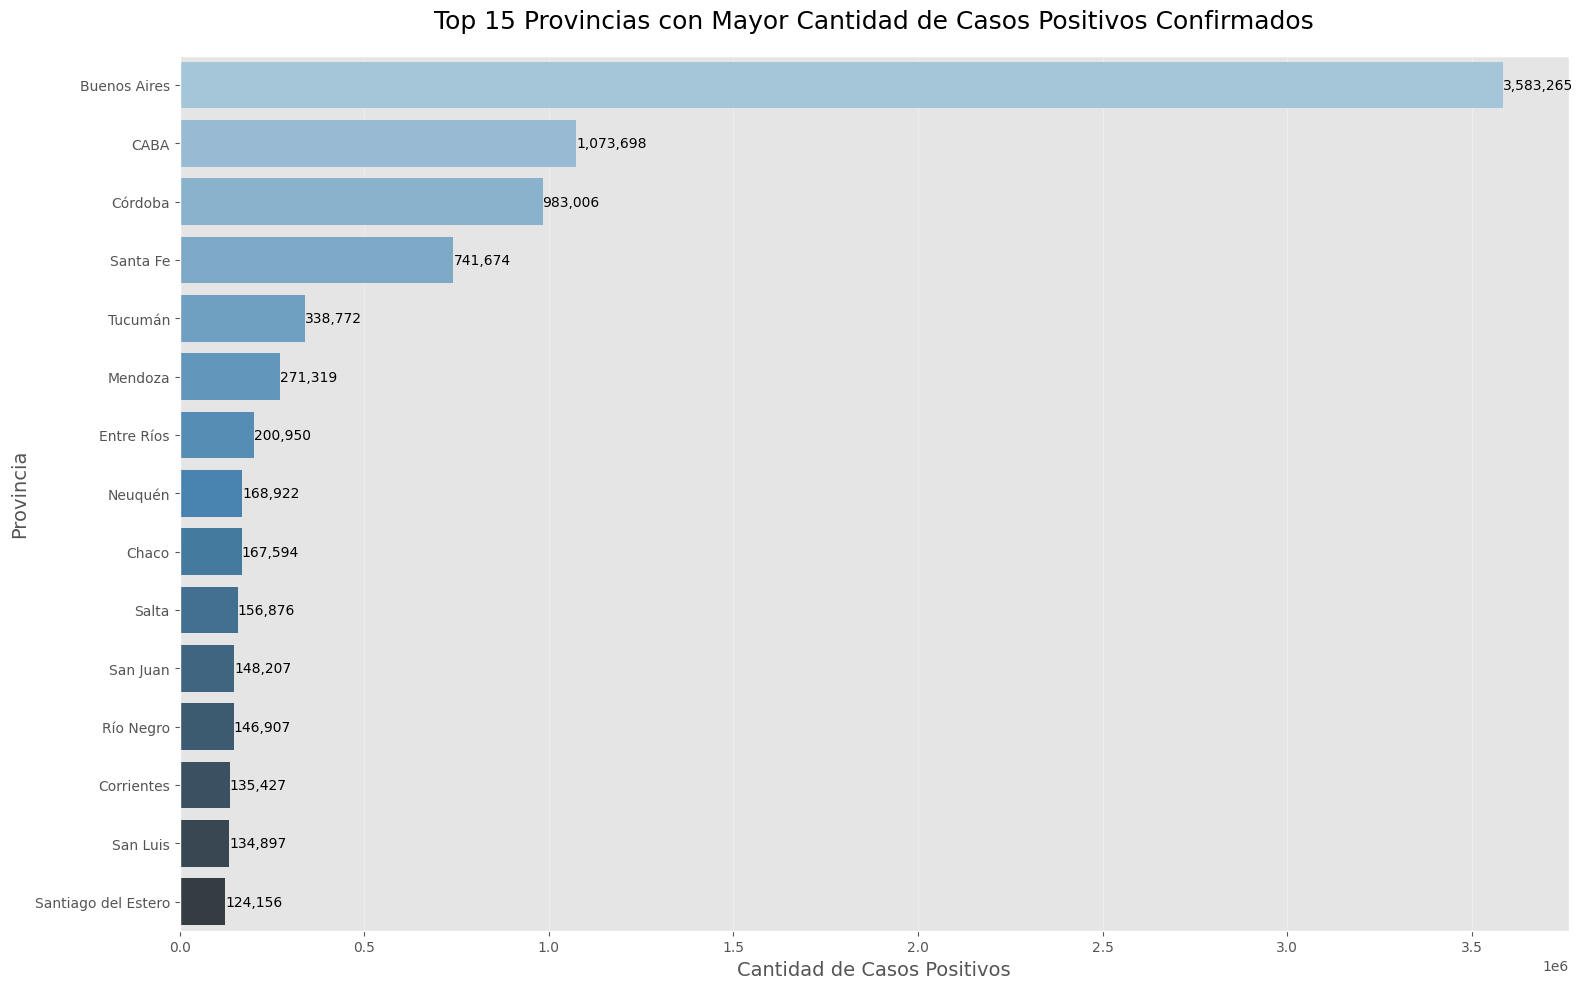

<Figure size 1400x600 with 0 Axes>

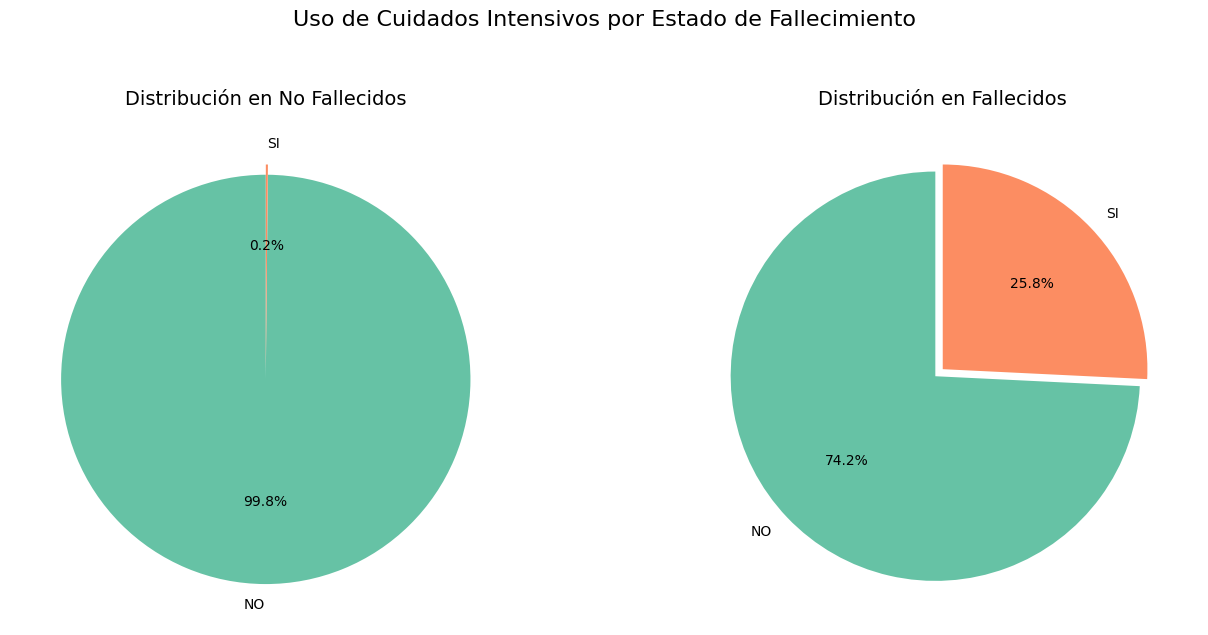

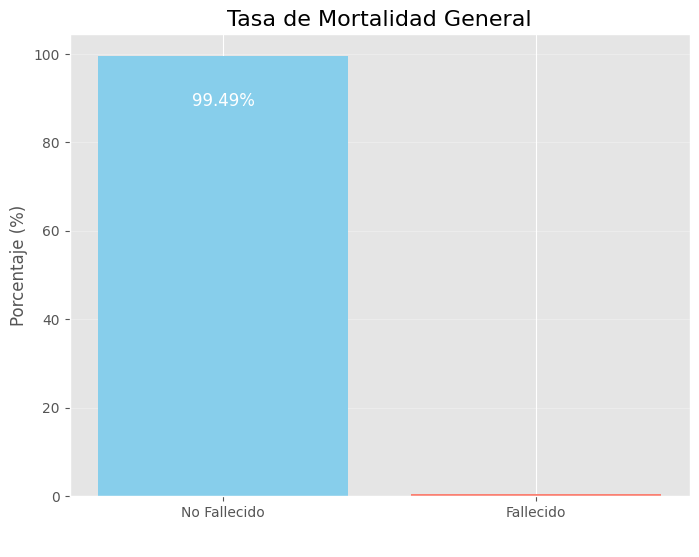

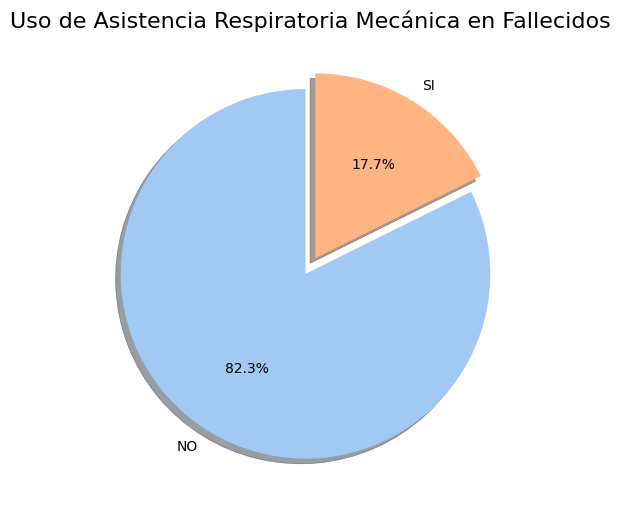

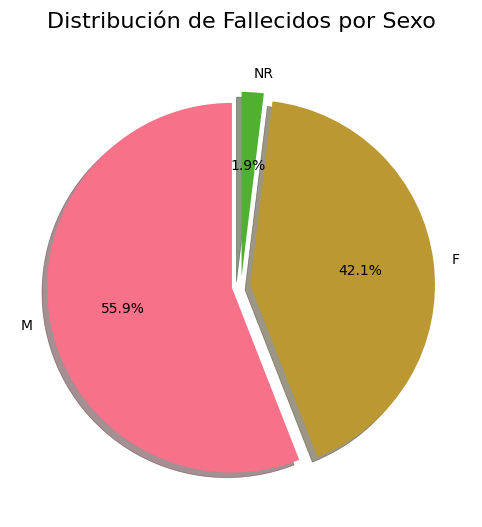

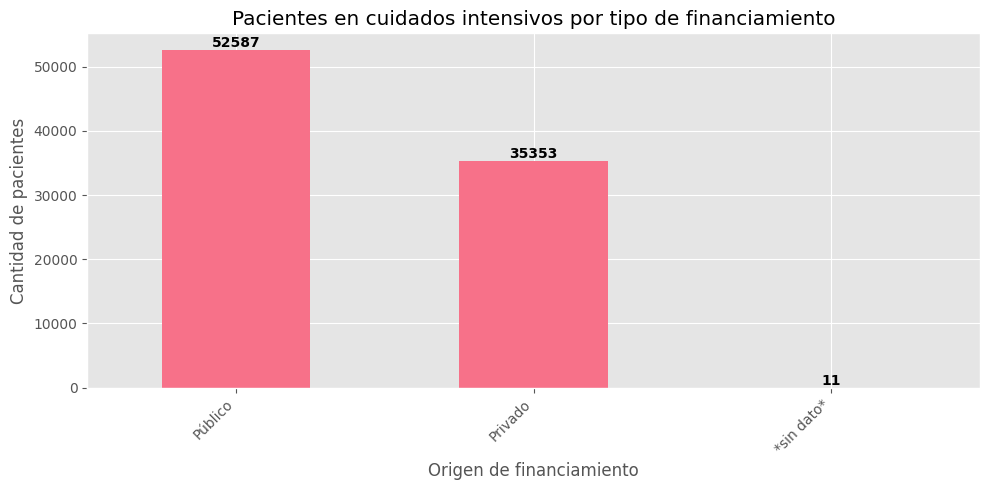

In [5]:
# ======================
# CONFIGURACIÓN INICIAL
# ======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# ======================
# 1. DISTRIBUCIÓN DE FALLECIDOS POR EDAD (0-120 AÑOS)
# ======================
plt.figure(figsize=(16, 8))
fallecidos = df[(df['fallecido'] == 'SI') & (df['edad'].between(0, 120))]
ax = sns.histplot(data=fallecidos, x='edad', bins=24, kde=True, color='crimson')  # 120/5=24 bins para 5 años cada uno

# Configurar eje x con marcas cada 5 años
ax.set_xticks(np.arange(0, 121, 5))
ax.set_xlim(0, 120)  # Rango completo de 0 a 120
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True, alpha=0.3)

# Añadir etiquetas de valores
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:  # Solo mostrar etiquetas para barras con valores
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{int(height)}', 
                ha='center', va='bottom', 
                fontsize=9, color='black')

plt.title('Distribución de Fallecidos por Edad (0-120 años)', fontsize=18, pad=20)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Cantidad de Fallecidos', fontsize=14)

# Añadir línea de media
media_edad = fallecidos['edad'].mean()
ax.axvline(media_edad, color='navy', linestyle='--', linewidth=2)
ax.text(media_edad+2, ax.get_ylim()[1]*0.9, 
        f'Media: {media_edad:.1f} años', 
        color='navy', fontsize=12)

plt.tight_layout()
plt.show()

# ======================
# 2. TOP 15 PROVINCIAS CON MÁS CASOS POSITIVOS (ACTUALIZADO)
# ======================
plt.figure(figsize=(16, 10))

# Filtrar solo casos positivos (asumiendo que 'clasificacion' identifica positivos)
casos_positivos = df[df['clasificacion'].str.contains('Confirmado|confirmado', case=False, na=False)]
top_provincias_positivas = casos_positivos['residencia_provincia_nombre'].value_counts().nlargest(15)

ax = sns.barplot(x=top_provincias_positivas.values, y=top_provincias_positivas.index, palette='Blues_d')

# Configuración del gráfico
ax.set_xlabel('Cantidad de Casos Positivos', fontsize=14)
ax.set_ylabel('Provincia', fontsize=14)

# Añadir etiquetas exactas
for i, v in enumerate(top_provincias_positivas.values):
    ax.text(v + 100, i, f'{v:,}', color='black', va='center', fontsize=10)

plt.title('Top 15 Provincias con Mayor Cantidad de Casos Positivos Confirmados', fontsize=18, pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ======================
# 3. RELACIÓN FALLECIMIENTO - CUIDADOS INTENSIVOS
# ======================
plt.figure(figsize=(14, 6))

# Datos
cross_tab = pd.crosstab(df['fallecido'], df['cuidado_intensivo'], normalize='index')

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para No Fallecidos
ax1.pie(cross_tab.loc['NO'], 
        labels=cross_tab.columns, 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62'],
        explode=(0.05, 0))
ax1.set_title('Distribución en No Fallecidos', fontsize=14)

# Gráfico para Fallecidos
ax2.pie(cross_tab.loc['SI'], 
        labels=cross_tab.columns, 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62'],
        explode=(0.05, 0))
ax2.set_title('Distribución en Fallecidos', fontsize=14)

plt.suptitle('Uso de Cuidados Intensivos por Estado de Fallecimiento', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# ======================
# 5. TASA DE MORTALIDAD
# ======================
plt.figure(figsize=(8, 6))
tasa_mortalidad = df['fallecido'].value_counts(normalize=True)*100
bars = plt.bar(tasa_mortalidad.index, tasa_mortalidad.values, color=['skyblue', 'salmon'])

plt.title('Tasa de Mortalidad General', fontsize=16)
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=[0, 1], labels=['No Fallecido', 'Fallecido'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-10,
             f'{height:.2f}%', ha='center', va='center', color='white', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

# ======================
# 6. ASISTENCIA RESPIRATORIA EN FALLECIDOS
# ======================
plt.figure(figsize=(10, 6))
arm_fallecidos = df[df['fallecido'] == 'SI']['asistencia_respiratoria_mecanica'].value_counts()

# Explode dinámico
explode_arm = tuple([0.05 for _ in range(len(arm_fallecidos))])

plt.pie(arm_fallecidos, 
        labels=arm_fallecidos.index, 
        autopct='%1.1f%%',
        startangle=90, 
        explode=explode_arm, 
        shadow=True, 
        colors=sns.color_palette('pastel'))
plt.title('Uso de Asistencia Respiratoria Mecánica en Fallecidos', fontsize=16)
plt.show()
# ======================
# 1. MUERTES SEGÚN SEXO (CORREGIDO)
# ======================
plt.figure(figsize=(10, 6))
df_muertes_sexo = df[df['fallecido'] == 'SI']['sexo'].value_counts()

# Crear explode dinámico basado en el número de categorías
explode = tuple([0.05 for _ in range(len(df_muertes_sexo))])

plt.pie(df_muertes_sexo, 
        labels=df_muertes_sexo.index, 
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True)
plt.title('Distribución de Fallecidos por Sexo', fontsize=16, pad=20)
plt.show()

# Filtrar solo pacientes que recibieron cuidados intensivos
df_cuidados = df[df["cuidado_intensivo"] == "SI"]

# Contar cantidad por tipo de financiamiento
conteo = df_cuidados["origen_financiamiento"].value_counts()

# Graficar con anotaciones
plt.figure(figsize=(10, 5))
ax = conteo.plot(kind="bar")

plt.title("Pacientes en cuidados intensivos por tipo de financiamiento")
plt.xlabel("Origen de financiamiento")
plt.ylabel("Cantidad de pacientes")
plt.xticks(rotation=45, ha="right")

# Agregar los valores encima de cada barra
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),                      # convertir a entero
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()


CONCLUSIONES 


🗂️ Resumen del dataset
Total de registros: 29.9 millones
Columnas analizadas: sexo, edad, provincia, UTI, fallecido, ARM, financiamiento, clasificación
Casos positivos confirmados: 9.2M (30.8%)
Casos descartados: 19.6M (65%)
Tasa de mortalidad general: 0.51%

👩‍⚕️ Distribución por sexo
Femenino: 52.9%
Masculino: 46.6%
No reportado (NR): 0.5%
👉 Leve predominio femenino en la cantidad de casos registrados.

🎂 Edad
Edad media general: 38.7 años
La mayoría de los casos entre 26 y 50 años.
Se detectaron valores anómalos (ej: negativos, >120 años) → requieren limpieza.

🧾 Clasificación de casos
Casos descartados: 65%
Casos confirmados: 31%
Casos sospechosos / otros: 4%
👉 Gran parte de las pruebas dieron resultado negativo.


⚰️ Mortalidad
0.51% del total de casos resultaron en fallecimiento.
Mortalidad mayor en hombres (55.9%) que en mujeres (42.1%).
Edad media de fallecidos: 71.3 años.

Picos de mortalidad en:
75 años → 20.474 fallecidos
80 años → 19.046 fallecidos
65 años → 17.794 fallecidos
👉 Mortalidad fuertemente asociada con edad avanzada.

🏥 Cuidados intensivos y respirador

En no fallecidos, solo 0.2% pasó por UTI.
En fallecidos, el 25.8% pasó por UTI.
17.7% de los fallecidos usó asistencia respiratoria mecánica (ARM).
👉 La necesidad de cuidados críticos fue un marcador muy fuerte de mal pronóstico.

🌍 Distribución geográfica

Top 15 provincias con mayor cantidad de casos positivos:
Buenos Aires, CABA, Córdoba, Santa Fe, Tucumán, Mendoza, Entre Ríos, Neuquén, Chaco, Salta, San Juan, Río Negro, Corrientes, San Luis, Santiago del Estero.
👉 Mayor circulación en áreas urbanas densamente pobladas.

🏛️ Origen de financiamiento en UTI

Público: 52.587 pacientes
Privado: 35.353 pacientes
👉 El sistema público de salud absorbió más casos críticos, mostrando su rol central en la pandemia.


✅ Síntesis general

📈 La positividad fue del 30.8%, con una mayoría de casos descartados.
👨‍🦳 La mortalidad se concentró en adultos mayores, especialmente a partir de los 65 años.
👨 Hombres presentaron mayor mortalidad que mujeres.
🏥 El uso de UTI y ARM estuvo altamente asociado a la muerte.
🌍 Buenos Aires y CABA fueron los principales focos de circulación viral.
🏛️ El sector público llevó la mayor carga de pacientes críticos.



✍️ Proyecto desarrollado y analizado por Sebastián Medina
Análisis exploratorio de datos realizado por Sebastián Medina
Informe preparado en el marco de mi portfolio de Data Science — Sebastián Medina